In [1]:
import pandas as pd
df= pd.read_csv("Flight Prediction/Clean_Dataset.csv")


In [2]:
df


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [4]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [5]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [6]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [7]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [8]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [9]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [10]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [11]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

## Preprocessing

In [12]:
df=df.drop('Unnamed: 0', axis=1)
df=df.drop('flight', axis=1)

df['class']=df['class'].apply(lambda x: 1 if x== 'Business' else 0)


In [13]:
df.stops = pd.factorize(df.stops)[0]

In [42]:
df.stops

0         0
1         0
2         0
3         0
4         0
         ..
300148    1
300149    1
300150    1
300151    1
300152    1
Name: stops, Length: 300153, dtype: int64

In [18]:
df=df.join(pd.get_dummies(df.airline, prefix='airline')).drop('airline', axis=1)
df=df.join(pd.get_dummies(df.source_city, prefix='source')).drop('source_city', axis=1)
df=df.join(pd.get_dummies(df.destination_city, prefix='dest')).drop('destination_city', axis=1)
df=df.join(pd.get_dummies(df.arrival_time, prefix='arrive')).drop('arrival_time', axis=1)
df=df.join(pd.get_dummies(df.departure_time, prefix='departure')).drop('departure_time', axis=1)

In [19]:
df


,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrive_Evening,arrive_Late_Night,arrive_Morning,arrive_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,5953,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,5956,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,5955,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,5955,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,77105,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,79099,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,81585,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


## Training Regression Model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X, y=df.drop('price', axis=1), df.price

In [23]:
X


,stops,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrive_Evening,arrive_Late_Night,arrive_Morning,arrive_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,False,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1,False,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
300149,1,1,10.42,49,False,False,False,False,False,True,...,False,False,False,True,True,False,False,False,False,False
300150,1,1,13.83,49,False,False,False,False,False,True,...,False,False,False,True,False,True,False,False,False,False
300151,1,1,10.00,49,False,False,False,False,False,True,...,True,False,False,False,False,True,False,False,False,False


In [24]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [25]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [28]:
r=RandomForestRegressor(n_jobs= -1)

r.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [29]:
r.score(X_test, y_test)

0.9851592194035711

In [34]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred= r.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9851592194035711
MAE: 1080.594717403566
MSE: 7674454.012271306
RMSE 2770.2804934286537


Text(0, 0.5, 'Predict vs Actual Price')

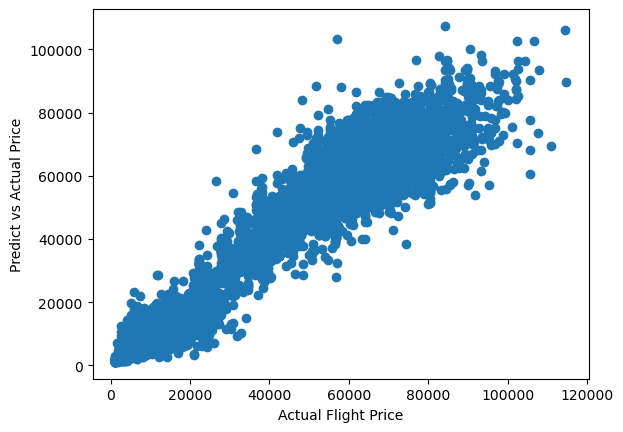

In [36]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predict vs Actual Price')

In [37]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [40]:
importances= dict(zip(r.feature_names_in_, r.feature_importances_))
sorted_importance = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importance

[('class', 0.8806093590091959),
 ('duration', 0.05743497314217598),
 ('days_left', 0.0183325469375976),
 ('airline_Air_India', 0.004991756882937419),
 ('airline_Vistara', 0.00479932221553029),
 ('source_Delhi', 0.003912495566844504),
 ('dest_Delhi', 0.0034239496782730618),
 ('source_Mumbai', 0.0021612953971110256),
 ('dest_Kolkata', 0.0018358267472837174),
 ('dest_Mumbai', 0.0018179211310817372),
 ('stops', 0.0018162814575347955),
 ('source_Kolkata', 0.0017285233216578337),
 ('dest_Hyderabad', 0.001542160137546518),
 ('arrive_Evening', 0.0015033591460098421),
 ('source_Hyderabad', 0.0013139674896577168),
 ('arrive_Night', 0.0011320181711643733),
 ('dest_Bangalore', 0.0011280909837376135),
 ('departure_Evening', 0.0011247620137097272),
 ('source_Bangalore', 0.0010643056288952282),
 ('arrive_Afternoon', 0.0010270420966417896),
 ('source_Chennai', 0.0009065547973917462),
 ('departure_Morning', 0.0008793951123859165),
 ('dest_Chennai', 0.0008428979993174756),
 ('departure_Afternoon', 0.000

In [41]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64